FRED API with Python
-----

## Wage data example

*July 23, 2017*<br>
*@bd_econ*

Retrieve data from FRED API using Python with the requests package. Use pandas for calculations and analysis. Create a dictionary of relevant results and present it as a table.

FRED API Documentation is [here](https://research.stlouisfed.org/docs/api/fred/)

In [1]:
# Import preliminaries
import requests
import pandas as pd
import config # file with api key

## Parameters/ Settings

In [2]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
s_dict = {'CES3000000008': 'Manufacturing AHE, SA', 
          'CES1000000008': 'Mining and Logging AHE, SA',
          'CES4000000008': 'Trade, Transportation, and Utilities AHE, SA',
          'CES2000000008': 'Construction AHE, SA',
          'CES5000000008': 'Information AHE, SA',
          'CES5500000008': 'Financial Activities AHE, SA',
          'CES6000000008': 'Professional and Business Services AHE, SA',
          'CES6500000008': 'Education and Health Services AHE, SA',
          'CES7000000008': 'Leisure and Hospitality AHE, SA',
          'AHETPI': 'Total Private AHE, SA',
          }

# Include start date, API key from config.py file and file type json
start_date = '1980-01-01'
dates = '&observation_start={}'.format(start_date)
api_key = '&api_key={}'.format(config.fred_key)
ftype = '&file_type=json'

## Make requests

In [3]:
df = pd.DataFrame()
for code, name in s_dict.items():
    url = '{}{}{}{}{}'.format(base, code, dates, api_key, ftype)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.tail()

,"Manufacturing AHE, SA","Mining and Logging AHE, SA","Trade, Transportation, and Utilities AHE, SA","Construction AHE, SA","Information AHE, SA","Financial Activities AHE, SA","Professional and Business Services AHE, SA","Education and Health Services AHE, SA","Leisure and Hospitality AHE, SA","Total Private AHE, SA"
2018-01-01,21.27,27.85,19.54,27.17,31.19,26.70,26.37,23.40,13.61,22.34
2018-02-01,21.32,27.77,19.54,27.41,31.18,26.74,26.40,23.41,13.63,22.39
2018-03-01,21.36,27.83,19.68,27.36,31.49,26.84,26.49,23.43,13.68,22.46
2018-04-01,21.43,27.94,19.76,27.49,31.29,26.89,26.54,23.45,13.73,22.52
2018-05-01,21.41,28.01,19.87,27.50,31.73,26.95,26.60,23.54,13.78,22.59


## Non API example

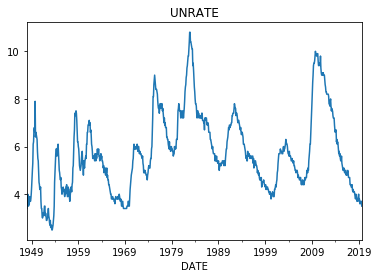

In [1]:
%matplotlib inline
import pandas as pd

series = 'UNRATE'

url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'

df = pd.read_csv(url, index_col='DATE', parse_dates=True)
df.plot(title=series, legend=False);